In [4]:
import pandas as pd
df=pd.read_csv('/content/beer-servings.csv')
df.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [5]:
df.columns

Index(['Unnamed: 0', 'country', 'beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [6]:
cols_to_drop1 = ["Unnamed: 0","country","continent"]
df = df.drop(columns=cols_to_drop1)
df.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [7]:
print('Missing values before handling:')
display(df.isnull().sum())

Missing values before handling:


,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1


In [8]:
# Fill numerical missing values with the mean
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

print('\nMissing values after handling:')
display(df.isnull().sum())


Missing values after handling:


,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0


In [9]:
df.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9


In [10]:
print(f"Shape of DataFrame before removing duplicates: {df.shape}")

Shape of DataFrame before removing duplicates: (193, 4)


In [11]:
df.drop_duplicates(inplace=True)
print(f"Shape of DataFrame after removing duplicates: {df.shape}")
display(df.head())

Shape of DataFrame after removing duplicates: (181, 4)


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9


In [12]:
print(f"Shape of DataFrame before outlier handling: {df.shape}")

Shape of DataFrame before outlier handling: (181, 4)


In [13]:
import numpy as np

print(f"Shape of DataFrame before outlier clipping: {df.shape}")

# Loop through each numerical column to detect and clip outliers
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and count outliers before clipping
    outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    if outliers_count > 0:
        print(f"\nClipping {outliers_count} outliers in column '{column}'.")
        df[column] = np.clip(df[column], lower_bound, upper_bound)
        print(f"Outliers in '{column}' clipped. Shape remains: {df.shape}")
    else:
        print(f"\nNo outliers to clip in column '{column}'.")

print(f"\nShape of DataFrame after outlier clipping: {df.shape}")
display(df.head())

Shape of DataFrame before outlier clipping: (181, 4)

No outliers to clip in column 'beer_servings'.

Clipping 5 outliers in column 'spirit_servings'.
Outliers in 'spirit_servings' clipped. Shape remains: (181, 4)

Clipping 22 outliers in column 'wine_servings'.
Outliers in 'wine_servings' clipped. Shape remains: (181, 4)

No outliers to clip in column 'total_litres_of_pure_alcohol'.

Shape of DataFrame after outlier clipping: (181, 4)


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,174.5,12.4
4,217.0,57.0,45.0,5.9


In [14]:
# Assuming the 4th column is the target variable (index 3)
X = df.iloc[:, :-1]  # All rows, all columns except the last one
y = df.iloc[:, -1]   # All rows, only the last column

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

print("\nFirst 5 rows of X:")
display(X.head())

print("\nFirst 5 rows of y:")
display(y.head())

Shape of X (features): (181, 3)
Shape of y (target): (181,)

First 5 rows of X:


,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,174.5
4,217.0,57.0,45.0



First 5 rows of y:


,total_litres_of_pure_alcohol
0,0.0
1,4.9
2,0.7
3,12.4
4,5.9


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nFirst 5 rows of X_train:")
display(X_train.head())

print("\nFirst 5 rows of y_train:")
display(y_train.head())

Shape of X_train: (144, 3)
Shape of X_test: (37, 3)
Shape of y_train: (144,)
Shape of y_test: (37,)

First 5 rows of X_train:


,beer_servings,spirit_servings,wine_servings
66,31.0,3.0,10.0
68,199.0,310.0,28.0
31,147.0,1.0,4.0
12,42.0,63.0,7.0
41,149.0,87.0,11.0



First 5 rows of y_train:


,total_litres_of_pure_alcohol
66,1.8
68,11.9
31,5.8
12,2.0
41,4.4


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to X_train and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Convert the scaled array back to a DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

print("Shape of scaled X_train (features):"), X_train_scaled.shape
print("\nFirst 5 rows of scaled X_train:")
display(X_train_scaled.head())

Shape of scaled X_train (features):

First 5 rows of scaled X_train:


,beer_servings,spirit_servings,wine_servings
0,0.082447,0.009677,0.057307
1,0.529255,1.000000,0.160458
2,0.390957,0.003226,0.022923
3,0.111702,0.203226,0.040115
4,0.396277,0.280645,0.063037


In [17]:
X_test_scaled = scaler.transform(X_test)

# Convert the scaled array back to a DataFrame for better readability
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Shape of scaled X_test (features):"), X_test_scaled.shape
print("\nFirst 5 rows of scaled X_test:")
display(X_test_scaled.head())

Shape of scaled X_test (features):

First 5 rows of scaled X_test:


,beer_servings,spirit_servings,wine_servings
0,0.061170,0.000000,0.0
1,0.611702,0.280645,1.0
2,0.404255,0.193548,1.0
3,0.023936,0.009677,0.0
4,0.718085,0.164516,1.0


In [18]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the scaled training data
linear_model.fit(X_train_scaled, y_train)

print("Linear Regression model fitted successfully.")

Linear Regression model fitted successfully.


In [19]:
from sklearn.linear_model import Lasso

# Initialize the Lasso Regression model
lasso_model = Lasso(random_state=42) # Added random_state for reproducibility

# Fit the model to the scaled training data
lasso_model.fit(X_train_scaled, y_train)

print("Lasso Regression model fitted successfully.")

Lasso Regression model fitted successfully.


In [20]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model
ridge_model = Ridge(random_state=42) # Added random_state for reproducibility

# Fit the model to the scaled training data
ridge_model.fit(X_train_scaled, y_train)

print("Ridge Regression model fitted successfully.")

Ridge Regression model fitted successfully.


In [21]:
from sklearn.metrics import r2_score

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred  = model.predict(X_test_scaled)

    results.append({
        "Model": name,
        "R2-Score (Train)": r2_score(y_train, y_train_pred),
        "R2-Score (Test)": r2_score(y_test, y_test_pred)
    })

In [22]:
results_df = pd.DataFrame(results)
results_df

,Model,R2-Score (Train),R2-Score (Test)
0,Linear Regression,0.822769,0.869149
1,Ridge Regression,0.820149,0.864484
2,Lasso Regression,0.822582,0.867162


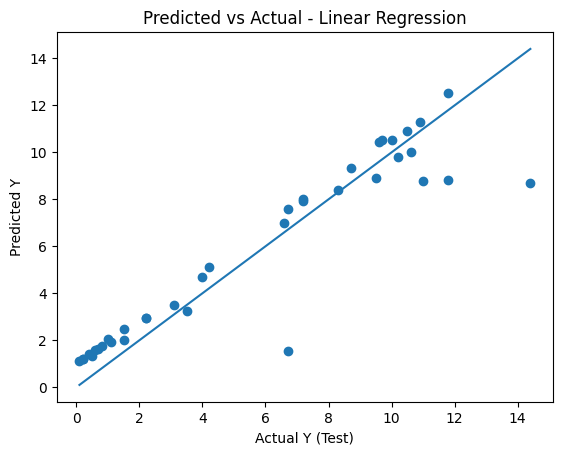

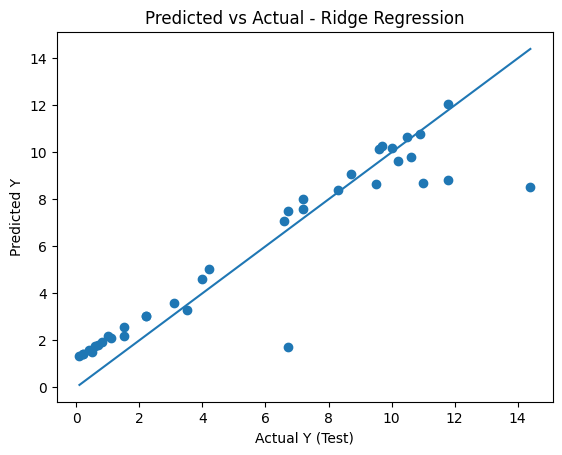

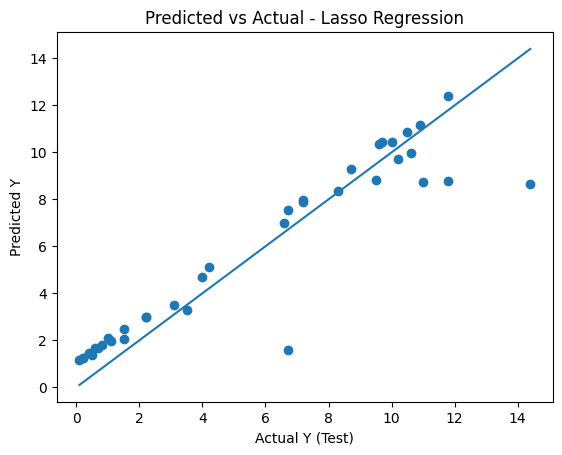

In [23]:
import matplotlib.pyplot as plt
def plot_predicted_vs_actual(y_test, y_pred, model_name):
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Y (Test)")
    plt.ylabel("Predicted Y")
    plt.title(f"Predicted vs Actual - {model_name}")

    # Perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val])

    plt.show()
for name, model in models.items():
    y_test_pred = model.predict(X_test_scaled)
    plot_predicted_vs_actual(y_test, y_test_pred, name)